In [227]:
import pandas as pd

filepath = 'datasets/Teams.csv'
df_teams = pd.read_csv(filepath, header = 0)#.drop(['MOV','Run Line +/-'], axis=1)

'''
Extract predictor variables:

Main variable

attendance - Home attendance total

Other variables

divID - Team's division
SB - Stolen bases
SF - Sacrifice flies
'''

df_teams_red = df_teams[['yearID', 'teamID', 'attendance', 'divID', 'SB', 'SF']]
df_teams_red.head(15)
#df_teams_red.loc[1871]

,yearID,teamID,attendance,divID,SB,SF
0,1871,BS1,NaN,NaN,73.0,NaN
1,1871,CH1,NaN,NaN,69.0,NaN
2,1871,CL1,NaN,NaN,18.0,NaN
3,1871,FW1,NaN,NaN,16.0,NaN
4,1871,NY2,NaN,NaN,46.0,NaN
5,1871,PH1,NaN,NaN,56.0,NaN
6,1871,RC1,NaN,NaN,53.0,NaN
7,1871,TRO,NaN,NaN,62.0,NaN
8,1871,WS3,NaN,NaN,48.0,NaN
9,1872,BL1,NaN,NaN,53.0,NaN


In [228]:
'''
Generate outcome variable:

win_percentages - Probability that a team wins a game
win_percentages = W/(W+L)
'''

df_calc_out = df_teams[['yearID', 'teamID', 'W', 'L']]
win_percentages = df_calc_out['W'].copy() / (df_calc_out['W'].copy() + df_calc_out['L'].copy())

In [229]:
# Remove rows containing NA values

df_teams_no_NA = df_teams_red.dropna()
df_teams_no_NA

,yearID,teamID,attendance,divID,SB,SF
1541,1970,ATL,1078848.0,W,58.0,42.0
1542,1970,BAL,1057069.0,E,84.0,46.0
1543,1970,BOS,1595278.0,E,50.0,47.0
1544,1970,CAL,1077741.0,W,69.0,37.0
1545,1970,CHA,495355.0,W,53.0,48.0
...,...,...,...,...,...,...
2980,2021,SLN,2102530.0,C,89.0,44.0
2981,2021,TBA,761072.0,E,88.0,41.0
2982,2021,TEX,2110258.0,W,106.0,31.0
2983,2021,TOR,805901.0,E,81.0,35.0


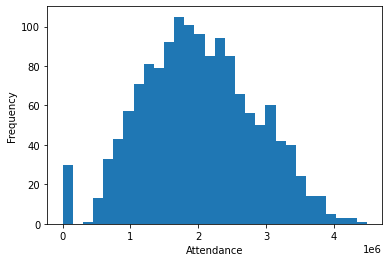

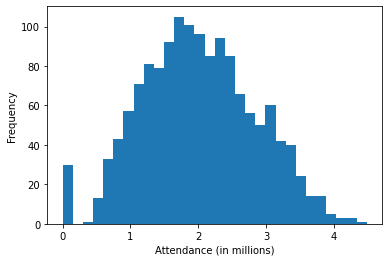

      yearID teamID divID     SB    SF
1541    1970    ATL     W   58.0  42.0
1542    1970    BAL     E   84.0  46.0
1543    1970    BOS     E   50.0  47.0
1544    1970    CAL     W   69.0  37.0
1545    1970    CHA     W   53.0  48.0
...      ...    ...   ...    ...   ...
2980    2021    SLN     C   89.0  44.0
2981    2021    TBA     E   88.0  41.0
2982    2021    TEX     W  106.0  31.0
2983    2021    TOR     E   81.0  35.0
2984    2021    WAS     E   56.0  31.0

[1444 rows x 5 columns]
      yearID teamID divID     SB    SF  attendance
1541    1970    ATL     W   58.0  42.0    1.078848
1542    1970    BAL     E   84.0  46.0    1.057069
1543    1970    BOS     E   50.0  47.0    1.595278
1544    1970    CAL     W   69.0  37.0    1.077741
1545    1970    CHA     W   53.0  48.0    0.495355
...      ...    ...   ...    ...   ...         ...
2980    2021    SLN     C   89.0  44.0    2.102530
2981    2021    TBA     E   88.0  41.0    0.761072
2982    2021    TEX     W  106.0  31.0    2.1102

C:\Users\minat\AppData\Local\Temp\ipykernel_16480\2120478645.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_no_NA.drop(['attendance'], axis=1, inplace=True)
C:\Users\minat\AppData\Local\Temp\ipykernel_16480\2120478645.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_no_NA['attendance'] = attendance_scaled


In [230]:
# Checking distributions of predictors

import matplotlib.pyplot as plt
import numpy as np

attendance = np.array(df_teams_no_NA.loc[:,['attendance']])
plt.hist(attendance, bins=30)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

# Scale down to the millions

scale = 1e6
attendance_scaled = attendance / scale
plt.hist(attendance_scaled, bins=30)
plt.xlabel('Attendance (in millions)')
plt.ylabel('Frequency')
plt.show()

# replace original column

df_teams_no_NA.drop(['attendance'], axis=1, inplace=True)
print(df_teams_no_NA)
df_teams_no_NA['attendance'] = attendance_scaled
print(df_teams_no_NA)

In [156]:
'''
# Let's now standardize this data, as the scale of attendance might have a bias towards the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_attendance = scaler.fit_transform(attendance.reshape(-1,1))

plt.hist(scaled_attendance, bins=30)
plt.xlabel('Normalized Attendance')
plt.ylabel('Frequency')
plt.show()
'''

"\n# Let's now standardize this data, as the scale of attendance might have a bias towards the model\n\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaled_attendance = scaler.fit_transform(attendance.reshape(-1,1))\n\nplt.hist(scaled_attendance, bins=30)\nplt.xlabel('Normalized Attendance')\nplt.ylabel('Frequency')\nplt.show()\n"

In [159]:
#!pip install statsmodels
from statsmodels.formula.api import ols
import seaborn as sns

df_teams_no_NA['attendance'].replace(inplace=True)

C:\Users\minat\AppData\Local\Temp\ipykernel_16480\3203698773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_no_NA['attendance'] = attendance_scaled


In [176]:
# Make unique primary key consisting of yearID and teamID (a team can be active across multiple years)

df_teams_no_NA.set_index(['yearID','teamID'], inplace=True)
df_teams_no_NA

attendance divID     SB    SF
yearID teamID                                 
1970   ATL     1.078848e-24     W   58.0  42.0
       BAL     1.057069e-24     E   84.0  46.0
       BOS     1.595278e-24     E   50.0  47.0
       CAL     1.077741e-24     W   69.0  37.0
       CHA     4.953550e-25     W   53.0  48.0
...                     ...   ...    ...   ...
2021   SLN     2.102530e-24     C   89.0  44.0
       TBA     7.610720e-25     E   88.0  41.0
       TEX     2.110258e-24     W  106.0  31.0
       TOR     8.059010e-25     E   81.0  35.0
       WAS     1.465543e-24     E   56.0  31.0

[1444 rows x 4 columns]